# Linear regression

For this exercise we are going to generate some synthetic data and create a simple univariate linear regression. The data will contain noise and we will try to recover the original linear equation from the noisy data.

In [60]:
# imports
import numpy as np
from numpy.random import default_rng
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [61]:
# here we will generate a sample of 63 points from the equation
# y = 2.38 x + 6.34 + e
# where e is randomly distributed noise
rng = default_rng()
x = np.linspace(0, 20, 63, endpoint=True)
e = rng.standard_normal(63)
y = (2.38*x) + 6.34
y = np.add(y,e)

In [62]:
print(x)

[ 0.          0.32258065  0.64516129  0.96774194  1.29032258  1.61290323
  1.93548387  2.25806452  2.58064516  2.90322581  3.22580645  3.5483871
  3.87096774  4.19354839  4.51612903  4.83870968  5.16129032  5.48387097
  5.80645161  6.12903226  6.4516129   6.77419355  7.09677419  7.41935484
  7.74193548  8.06451613  8.38709677  8.70967742  9.03225806  9.35483871
  9.67741935 10.         10.32258065 10.64516129 10.96774194 11.29032258
 11.61290323 11.93548387 12.25806452 12.58064516 12.90322581 13.22580645
 13.5483871  13.87096774 14.19354839 14.51612903 14.83870968 15.16129032
 15.48387097 15.80645161 16.12903226 16.4516129  16.77419355 17.09677419
 17.41935484 17.74193548 18.06451613 18.38709677 18.70967742 19.03225806
 19.35483871 19.67741935 20.        ]


In [63]:
print(y)

[ 5.31741859  8.54251703  6.74109377  7.61861881  8.22358603  9.20068669
 10.95955277 13.22625503 12.82303268 13.73135644 13.39112293 13.44562059
 15.45701746 18.7017575  18.41994676 20.25787022 19.45696553 18.52804147
 19.62729768 22.93579327 22.80237457 24.14096591 22.66687463 23.97658342
 26.02375522 25.38278527 27.4271458  25.9199969  29.60954058 29.29147725
 28.49298431 30.13428807 30.58776364 31.14880513 34.09497887 32.65755974
 33.92999559 34.97367796 34.21930392 35.0186707  35.55596418 36.65621759
 37.58119143 39.63053475 40.02364152 40.94906108 42.37549667 40.9002715
 41.29393326 42.88228835 44.75787336 44.17113573 45.85616497 46.52561294
 48.64481493 49.25203551 51.24672645 48.67605158 51.80990769 50.67617554
 52.84329506 53.64986976 52.58267481]


In [64]:
print(e)

[-1.02258141  1.4347751  -1.1343901  -1.024607   -1.18738171 -0.97802299
  0.01310115  1.51206148  0.3410972   0.48167902 -0.62629642 -1.3395407
 -0.09588576  2.38111234  1.33155966  2.40174119  0.83309456 -0.86357144
 -0.53205716  2.0086965   1.10753586  1.67838527 -0.56344795 -0.02148109
  1.25794877 -0.15076312  1.12585547 -1.14903536  1.77276638  0.68696112
 -0.87927375 -0.00571193 -0.3199783  -0.52667874  1.65175306 -0.55340801
 -0.04871409  0.22722635 -1.29488962 -1.26326479 -1.49371324 -1.16120176
 -1.00396986  0.27763153 -0.09700364  0.06067399  0.71936764 -1.52359947
 -1.89767964 -1.07706649  0.03077659 -1.32370298 -0.40641567 -0.50470964
  0.84675041  0.68622905  1.91317806 -1.42523874  0.94087543 -0.96059866
  0.43877894  0.4776117  -1.35732519]


Text(0.5, 1.0, 'Scatter Plot Random Data')

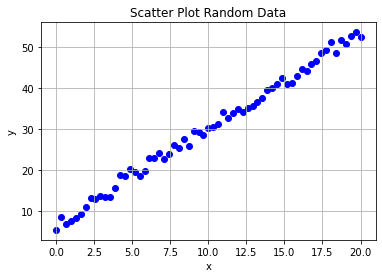

In [65]:
plt.scatter(x,y, color='blue',marker= 'o')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot Random Data')

In [66]:
# Create the linear regression model
regr = linear_model.LinearRegression()

In [67]:
# Fit the model
regr.fit(x.reshape(63, 1), y)

LinearRegression()

In [68]:
regr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [69]:
regr.intercept_, regr.coef_, 

(6.612996176848984, array([2.35083692]))

In [75]:
regr.score(x.reshape(63, 1), y, sample_weight=None)

0.9937928137454216

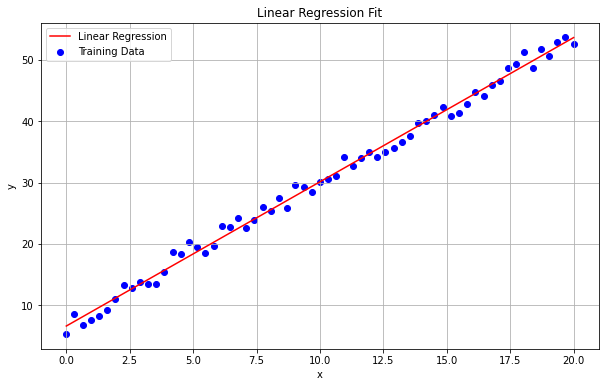

In [73]:
plt.scatter(x, y, color='blue', marker= 'o', label= 'Training Data')
plt.plot(x, regr.predict(x.reshape(63, 1)), color='red', label='Linear Regression')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
